# Solving Rubik's Cube with Python

## 1. Introduction

## Overview of the Rubik's Cube

The Rubik's Cube, invented by Ernő Rubik in 1974, is a classic 3D combination puzzle that has fascinated people around the world for decades. It consists of a 3x3x3 grid that features six faces, each originally covered by nine stickers of a single color: white, red, blue, orange, green, and yellow. The goal of the puzzle is to return the cube to its original state after the faces have been scrambled, with each face displaying a uniform color.

Since its invention, the Rubik's Cube has become one of the most popular puzzles worldwide, captivating both casual players and serious enthusiasts. Over the years, various methods have been developed to solve the Rubik's Cube, ranging from beginner-friendly approaches to advanced techniques used by speedcubers to achieve astonishingly fast solve times. Despite its seemingly simple appearance, the Rubik's Cube is a complex puzzle with over 43 quintillion possible configurations. Solving the cube involves understanding and applying a series of algorithms to manipulate its pieces back into their solved state.

### Project Goal

The objective of this project is to create a Python program capable of simulating, scrambling, and solving a Rubik's Cube via a computational approach. We will explore the fundamentals of the cube's structure, implement the necessary moves to randomize and solve it, and visualize the cube at different stages. Specifically, we will leverage the kociemba algorithm, known for its efficiency in finding a solution with the least number of moves.

This project serves as both an educational tool and a fun challenge, demonstrating Python's versatility in handling complex problems as well as providing insights into how algorithms and data structures can be applied to solve real-world puzzles.

## 2. Setting Up the Environment

### Installing necessary libraries:

• kociemba: A Python implementation of the Two-Phase algorithm by Herbert Kociemba for solving the Rubik's Cube. This library solves the cube by taking the current state of the cube and returning a sequence of moves to solve it.

• numpy: For handling the cube's state as an array.

• matplotlib: For visualizing the cube's configurtion and its transformations.

In [2]:
!pip install kociemba numpy matplotlib

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import random

## 3. Understanding the Cube Structure

### Rubik's Cube Representation

A Rubik's Cube can be represented using a 6x9 array, where each row corresponds to a face of the cube, and each element is a sticker color.

### Implementing the Cube Class

Define a Python class RubiksCube to encapsulate the state and operations of the Rubik's Cube.

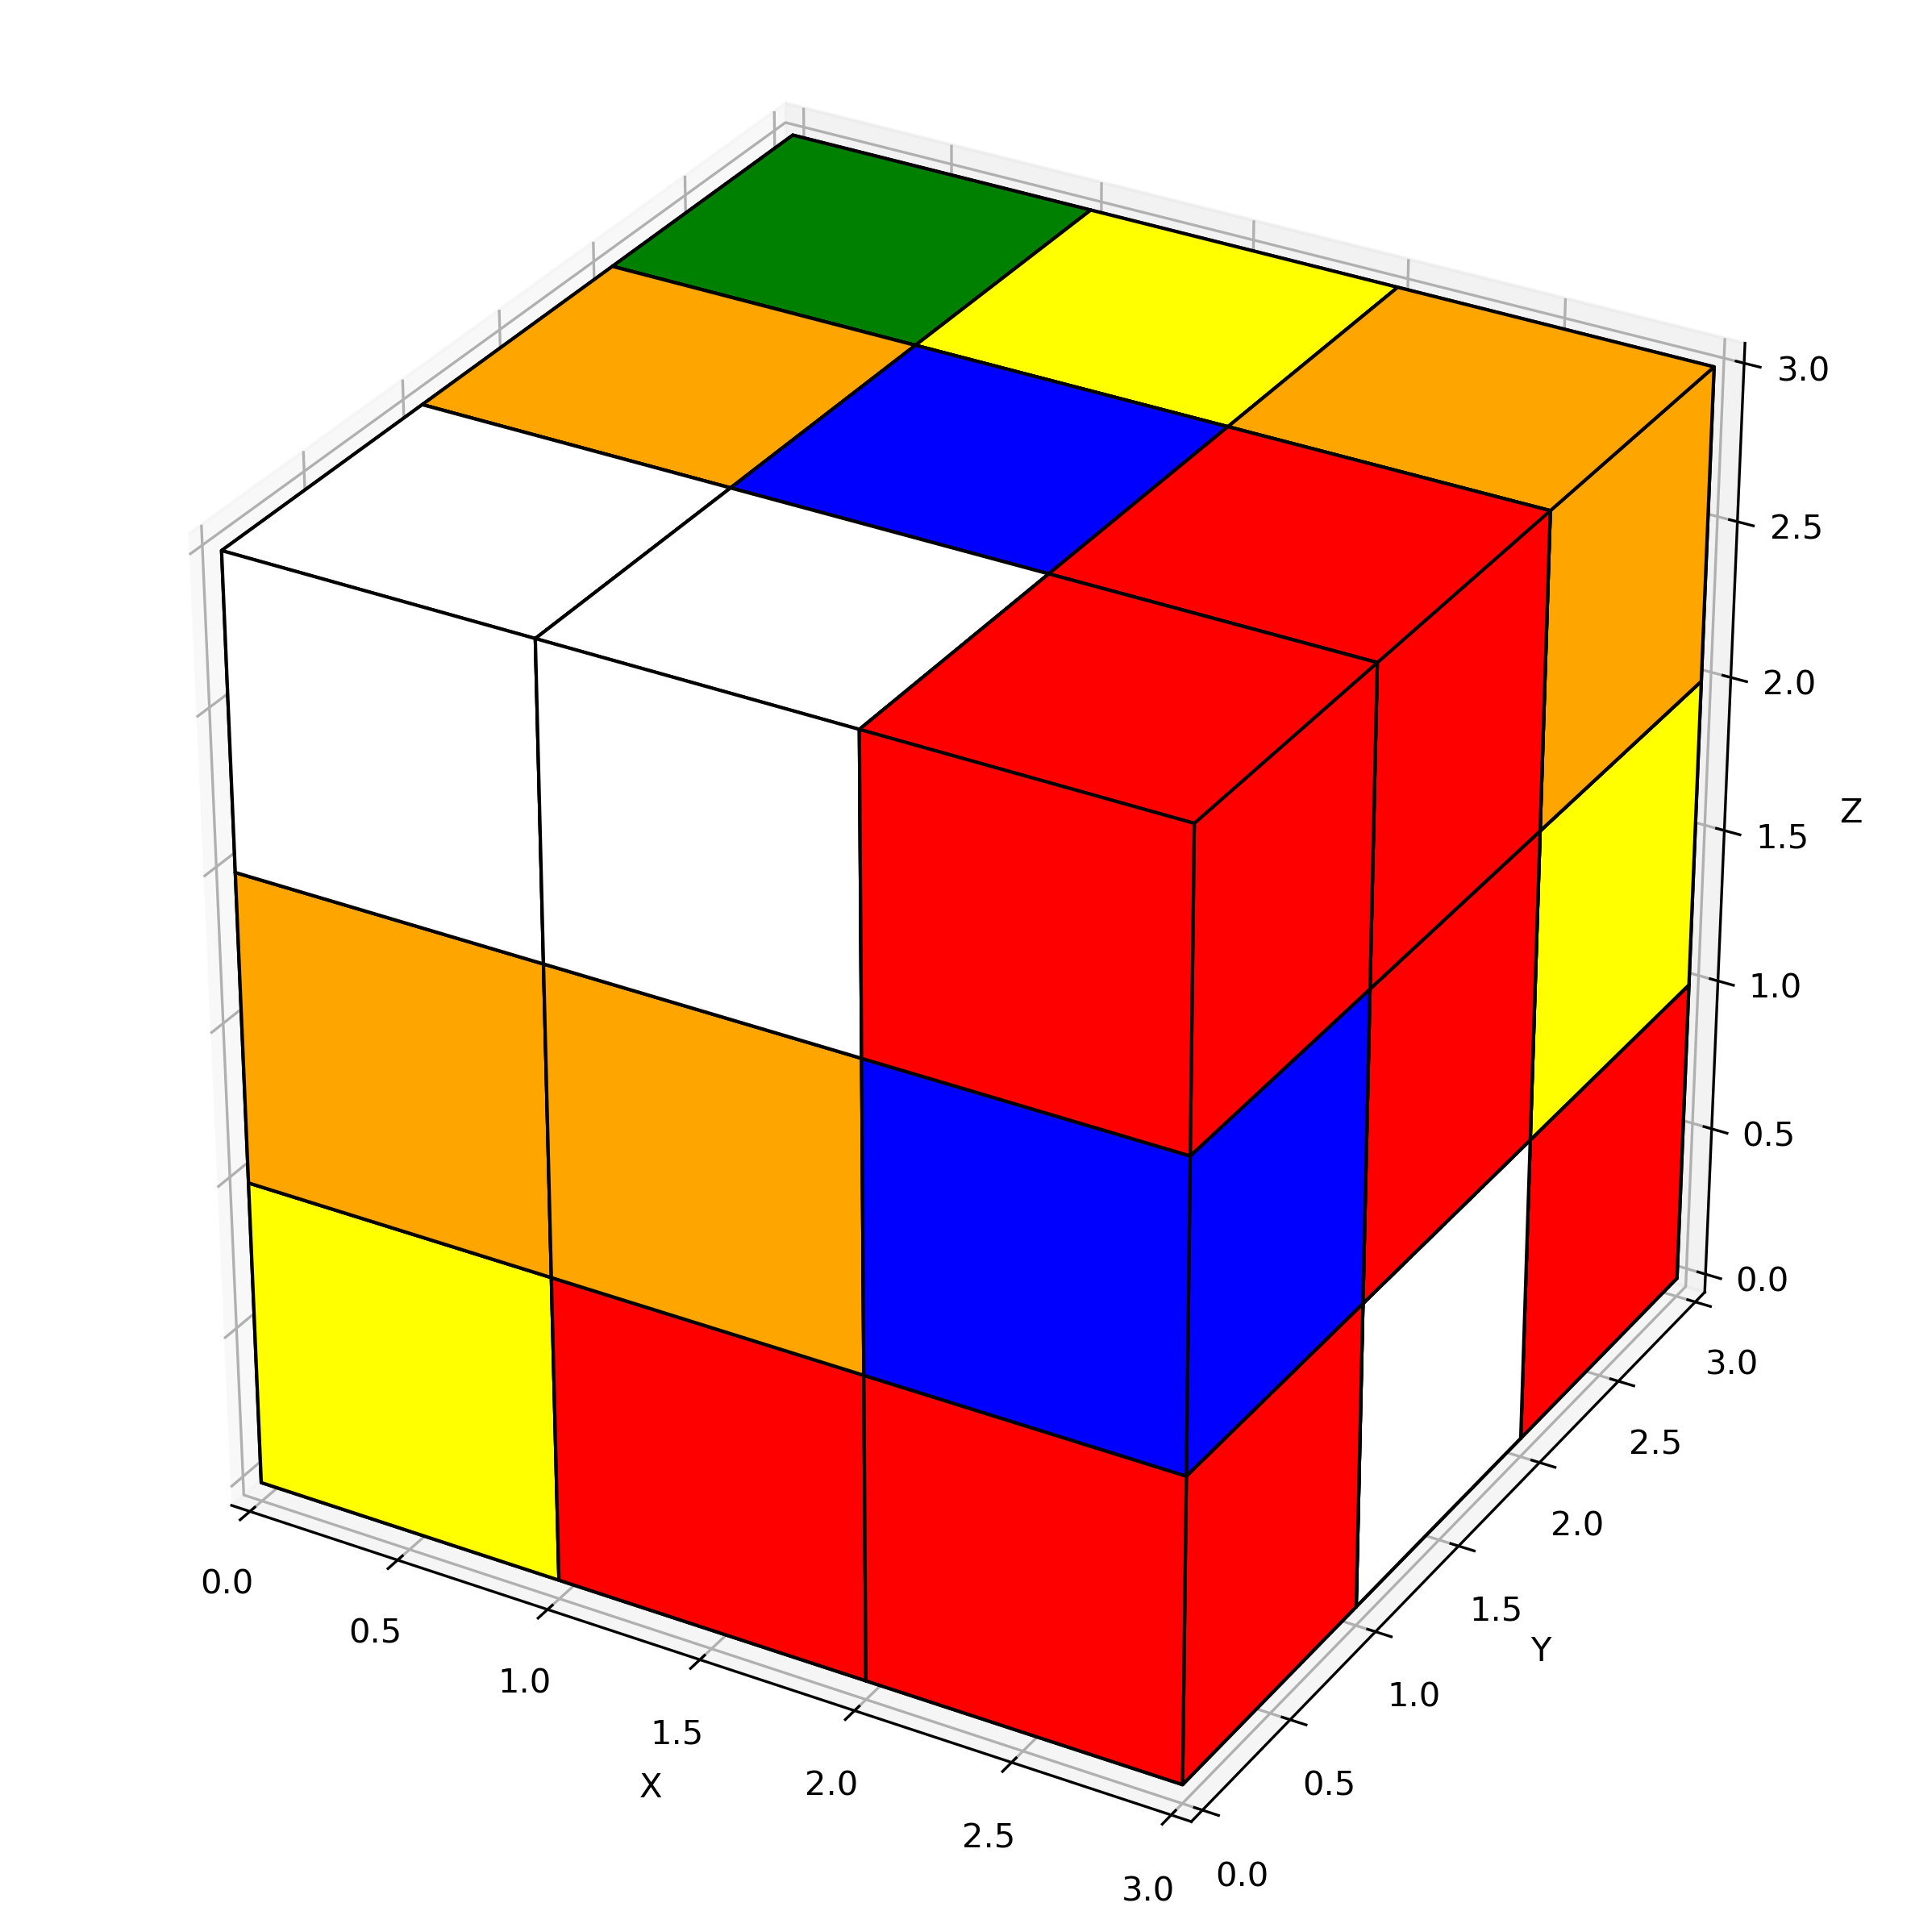

In [58]:
def draw_cube(ax, color, position):
    """Draw a single small cube at the given position."""
    # Define the 8 vertices of a cube, offset by the given position
    vertices = np.array([
        [0, 0, 0],
        [1, 0, 0],
        [1, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 1],
        [1, 1, 1],
        [0, 1, 1]
    ]) + position
    
    # Define the 6 faces of the cube
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]], # bottom
        [vertices[4], vertices[5], vertices[6], vertices[7]], # top
        [vertices[0], vertices[1], vertices[5], vertices[4]], # front
        [vertices[2], vertices[3], vertices[7], vertices[6]], # back
        [vertices[0], vertices[3], vertices[7], vertices[4]], # left
        [vertices[1], vertices[2], vertices[6], vertices[5]]  # right
    ]
    
    # Create the cube's faces and add them to the plot
    poly3d = Poly3DCollection(faces, facecolors=color, linewidths=1, edgecolors='k', alpha=1)  # Set alpha to 1 for non-transparency
    ax.add_collection3d(poly3d)

def plot_random_rubiks_cube():
    fig = plt.figure(figsize=(10, 10), dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    # Set the aspect ratio to be equal
    ax.set_box_aspect([1,1,1])
    
    # Create a list of colors for different cube faces
    colors = ['red', 'green', 'blue', 'yellow', 'orange', 'white']
    
    # Generate random positions for the small cubes
    positions = [(x, y, z) for x in range(3) for y in range(3) for z in range(3)]
    random.shuffle(positions)  # Shuffle positions to randomize the cube
    
    # Draw each small cube with a random color from the list
    for pos in positions:
        color = random.choice(colors)  # Randomly choose a color for each small cube
        draw_cube(ax, color, pos)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    ax.set_zlim(0, 3)
    
    plt.show()

plot_random_rubiks_cube()

Scramble sequence: ["L'", 'U', "R'", 'F', "D'", "L'", 'U', "D'", 'U', "U'", 'L', "R'", "L'", 'B', "L'", "B'", 'D', 'L', 'L', 'F']


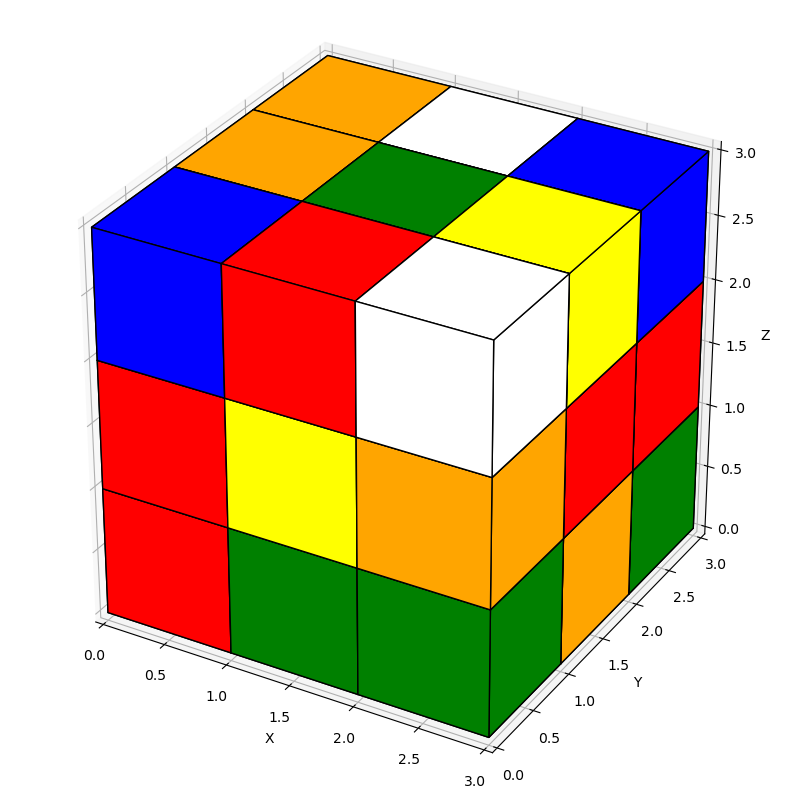

Solution sequence: Error. Probably cubestring is invalid


In [77]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import random
import kociemba

def draw_cube(ax, color, position):
    """Draw a single small cube at the given position."""
    vertices = np.array([
        [0, 0, 0],
        [1, 0, 0],
        [1, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 1],
        [1, 1, 1],
        [0, 1, 1]
    ]) + position
    
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]], # bottom
        [vertices[4], vertices[5], vertices[6], vertices[7]], # top
        [vertices[0], vertices[1], vertices[5], vertices[4]], # front
        [vertices[2], vertices[3], vertices[7], vertices[6]], # back
        [vertices[0], vertices[3], vertices[7], vertices[4]], # left
        [vertices[1], vertices[2], vertices[6], vertices[5]]  # right
    ]
    
    poly3d = Poly3DCollection(faces, facecolors=color, linewidths=1, edgecolors='k', alpha=1)
    ax.add_collection3d(poly3d)

def plot_cube(colors):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect([1,1,1])
    
    positions = [(x, y, z) for x in range(3) for y in range(3) for z in range(3)]
    random.shuffle(positions)
    
    for pos in positions:
        color = random.choice(colors)
        draw_cube(ax, color, pos)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    ax.set_zlim(0, 3)
    plt.show()

def scramble_cube():
    """Scramble the cube by applying random moves."""
    moves = ['U', 'D', 'L', 'R', 'F', 'B', 'U\'', 'D\'', 'L\'', 'R\'', 'F\'', 'B\'']
    scramble_sequence = [random.choice(moves) for _ in range(20)]
    return scramble_sequence

def rotate_face(face):
    """Rotate a 3x3 face 90 degrees clockwise."""
    return np.array(face).reshape(3, 3).T.flatten()[::-1]

def rotate_faces(cube, move):
    """Rotate the faces of the cube according to the move."""
    face_indices = {
        'U': 0, 'D': 1, 'L': 2, 'R': 3, 'F': 4, 'B': 5
    }
    adjacent_faces = {
        'U': [2, 4, 3, 1],  # L, F, R, B
        'D': [2, 5, 3, 4],  # L, B, R, F
        'L': [0, 4, 1, 5],  # U, F, D, B
        'R': [0, 5, 1, 4],  # U, B, D, F
        'F': [0, 2, 1, 3],  # U, L, D, R
        'B': [0, 3, 1, 2]   # U, R, D, L
    }

    clockwise_moves = ['U', 'D', 'L', 'R', 'F', 'B']
    counterclockwise_moves = ['U\'', 'D\'', 'L\'', 'R\'', 'F\'', 'B\'']

    if move in clockwise_moves:
        index = face_indices[move]
    elif move in counterclockwise_moves:
        index = face_indices[move[0]]
        move = move[0]  # Remove the prime
        cube[index] = rotate_face(cube[index])  # Apply clockwise once
        # Rotate the adjacent faces in the opposite direction
        adj_faces = adjacent_faces[move]
        temp = cube[adj_faces[0]].copy()
        for i in range(4):
            cube[adj_faces[i]] = np.roll(cube[adj_faces[i]], shift=1, axis=None)
        cube[adj_faces[3]] = temp
        return cube
    else:
        raise ValueError(f"Unknown move: {move}")

    # Rotate the specified face
    cube[index] = rotate_face(cube[index])
    
    # Rotate adjacent faces
    adj_faces = adjacent_faces[move]
    temp = cube[adj_faces[0]].copy()
    for i in range(4):
        cube[adj_faces[i]] = np.roll(cube[adj_faces[i]], shift=-1, axis=None)
    cube[adj_faces[3]] = temp

    return cube

def apply_move(state, move):
    """Apply a single move to the cube state."""
    # Convert state to a list of 3x3 faces
    faces = [list(state[i*9:(i+1)*9]) for i in range(6)]

    # Apply the move
    faces = rotate_faces(faces, move)
    
    # Convert faces back to a single state string
    new_state = ''.join(''.join(face) for face in faces)
    return new_state

def scramble_to_state(scramble_sequence):
    """Convert scramble sequence to a cube state string."""
    solved_state = 'UUUUUUUUURRRRRRRRRRDDDDDDDDDLLLLLLLLLFFFFFFFFFBBBBBBBBB'
    state = solved_state
    
    for move in scramble_sequence:
        state = apply_move(state, move)
    
    return state

def solve_cube(scramble_sequence):
    """Solve the cube using the scramble sequence."""
    # Convert scramble sequence to cube state string
    cube_state = scramble_to_state(scramble_sequence)
    
    try:
        # Solve the cube
        solution = kociemba.solve(cube_state)
    except ValueError as e:
        return str(e)
    
    return solution

# Define colors for different cube faces
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'white']

# Scramble the cube
scramble_sequence = scramble_cube()
print("Scramble sequence:", scramble_sequence)

# Plot the scrambled cube
plot_cube(colors)

# Solve the cube
solution = solve_cube(scramble_sequence)
print("Solution sequence:", solution)


In [70]:
# Define the Rubik's Cube class
class RubiksCube:
    def __init__(self):
        # Initialize a solved Rubik's Cube with standard color notation
        self.state = np.array([
            ['W']*9,  # White face (top)
            ['R']*9,  # Red face (front)
            ['B']*9,  # Blue face (right)
            ['O']*9,  # Orange face (back)
            ['G']*9,  # Green face (left)
            ['Y']*9   # Yellow face (bottom)
        ])

    def __repr__(self):
        return str(self.state)

    def apply_move(self, move):
        # Apply move to the Rubik's Cube
        if move == 'U':
            self.rotate_face_clockwise(0)
            self.rotate_sides('U')
        elif move == "U'":
            self.rotate_face_counterclockwise(0)
            self.rotate_sides("U'")
        elif move == 'D':
            self.rotate_face_clockwise(5)
            self.rotate_sides('D')
        elif move == "D'":
            self.rotate_face_counterclockwise(5)
            self.rotate_sides("D'")
        elif move == 'L':
            self.rotate_face_clockwise(4)
            self.rotate_sides('L')
        elif move == "L'":
            self.rotate_face_counterclockwise(4)
            self.rotate_sides("L'")
        elif move == 'R':
            self.rotate_face_clockwise(2)
            self.rotate_sides('R')
        elif move == "R'":
            self.rotate_face_counterclockwise(2)
            self.rotate_sides("R'")
        elif move == 'F':
            self.rotate_face_clockwise(1)
            self.rotate_sides('F')
        elif move == "F'":
            self.rotate_face_counterclockwise(1)
            self.rotate_sides("F'")
        elif move == 'B':
            self.rotate_face_clockwise(3)
            self.rotate_sides('B')
        elif move == "B'":
            self.rotate_face_counterclockwise(3)
            self.rotate_sides("B'")

    def rotate_face_clockwise(self, face_index):
        # Rotate a face 90 degrees clockwise
        face = self.state[face_index].reshape(3, 3)
        self.state[face_index] = np.rot90(face, -1).flatten()

    def rotate_face_counterclockwise(self, face_index):
        # Rotate a face 90 degrees counter-clockwise
        face = self.state[face_index].reshape(3, 3)
        self.state[face_index] = np.rot90(face, 1).flatten()

    def rotate_sides(self, move):
        # Rotate the sides affected by a face rotation
        if move == 'U':
            top_row = self.state[1][0:3].copy()
            self.state[1][0:3] = self.state[4][0:3]
            self.state[4][0:3] = self.state[3][0:3]
            self.state[3][0:3] = self.state[2][0:3]
            self.state[2][0:3] = top_row
        elif move == "U'":
            top_row = self.state[1][0:3].copy()
            self.state[1][0:3] = self.state[2][0:3]
            self.state[2][0:3] = self.state[3][0:3]
            self.state[3][0:3] = self.state[4][0:3]
            self.state[4][0:3] = top_row
        elif move == 'D':
            bottom_row = self.state[1][6:9].copy()
            self.state[1][6:9] = self.state[2][6:9]
            self.state[2][6:9] = self.state[3][6:9]
            self.state[3][6:9] = self.state[4][6:9]
            self.state[4][6:9] = bottom_row
        elif move == "D'":
            bottom_row = self.state[1][6:9].copy()
            self.state[1][6:9] = self.state[4][6:9]
            self.state[4][6:9] = self.state[3][6:9]
            self.state[3][6:9] = self.state[2][6:9]
            self.state[2][6:9] = bottom_row
        elif move == 'L':
            left_col = self.state[1][0:9:3].copy()
            self.state[1][0:9:3] = self.state[5][0:9:3]
            self.state[5][0:9:3] = self.state[3][8:0:-3]
            self.state[3][8:0:-3] = self.state[0][0:9:3]
            self.state[0][0:9:3] = left_col
        elif move == "L'":
            left_col = self.state[1][0:9:3].copy()
            self.state[1][0:9:3] = self.state[0][0:9:3]
            self.state[0][0:9:3] = self.state[3][8:0:-3]
            self.state[3][8:0:-3] = self.state[5][0:9:3]
            self.state[5][0:9:3] = left_col
        elif move == 'R':
            right_col = self.state[1][2:9:3].copy()
            self.state[1][2:9:3] = self.state[0][2:9:3]
            self.state[0][2:9:3] = self.state[3][2:9:3]
            self.state[3][2:9:3] = self.state[5][2:9:3]
            self.state[5][2:9:3] = right_col
        elif move == "R'":
            right_col = self.state[1][2:9:3].copy()
            self.state[1][2:9:3] = self.state[5][2:9:3]
            self.state[5][2:9:3] = self.state[3][2:9:3]
            self.state[3][2:9:3] = self.state[0][2:9:3]
            self.state[0][2:9:3] = right_col
        elif move == 'F':
            front_row = self.state[1][6:9].copy()
            self.state[1][6:9] = self.state[4][6:9]
            self.state[4][6:9] = self.state[3][2:5]
            self.state[3][2:5] = self.state[2][6:9]
            self.state[2][6:9] = front_row
        elif move == "F'":
            front_row = self.state[1][6:9].copy()
            self.state[1][6:9] = self.state[2][6:9]
            self.state[2][6:9] = self.state[3][2:5]
            self.state[3][2:5] = self.state[4][6:9]
            self.state[4][6:9] = front_row
        elif move == 'B':
            back_row = self.state[1][0:3].copy()
            self.state[1][0:3] = self.state[2][0:3]
            self.state[2][0:3] = self.state[3][6:9]
            self.state[3][6:9] = self.state[4][0:3]
            self.state[4][0:3] = back_row
        elif move == "B'":
            back_row = self.state[1][0:3].copy()
            self.state[1][0:3] = self.state[4][0:3]
            self.state[4][0:3] = self.state[3][6:9]
            self.state[3][6:9] = self.state[2][0:3]
            self.state[2][0:3] = back_row

    def randomize(self, moves=20):
        move_list = ['U', 'D', 'L', 'R', 'F', 'B', "U'", "D'", "L'", "R'", "F'", "B'"]
        for _ in range(moves):
            move = random.choice(move_list)
            self.apply_move(move)
        return self


### Visualization of the Cube

Create a simple function to visualize the cube's state using matplotlib.

In [51]:
# Define a function to visualize the cube in 3D
def visualize_cube_3d(cube):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define the colors for the faces
    color_map = {'W': 'white', 'R': 'red', 'B': 'blue', 'O': 'orange', 'G': 'green', 'Y': 'yellow'}

    # Define vertices and faces of the cube
    vertices = np.array([
        [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],  # Bottom face
        [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]   # Top face
    ])

    # Define the 6 faces of the cube
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],  # Bottom face
        [vertices[4], vertices[5], vertices[6], vertices[7]],  # Top face
        [vertices[0], vertices[1], vertices[5], vertices[4]],  # Front face
        [vertices[2], vertices[3], vertices[7], vertices[6]],  # Back face
        [vertices[1], vertices[2], vertices[6], vertices[5]],  # Right face
        [vertices[0], vertices[3], vertices[7], vertices[4]]   # Left face
    ]

    # Map each face of the cube to its respective color
    face_colors = [color_map[cube.state[i][4]] for i in range(6)]  # Center piece color of each face

    # Plot each face of the cube
    for i, face in enumerate(faces):
        poly3d = [[face]]
        ax.add_collection3d(Poly3DCollection(poly3d, facecolors=face_colors[i], linewidths=1, edgecolors='k', alpha=0.8))

    # Set aspect ratio and labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])
    ax.view_init(elev=20., azim=30)

    plt.show()

## 4. Randomizing the Cube

### Generating Random Moves

Implement a function to scramble the cube by applying random moves. The standard moves include U (up), D (down), L (left), R (right), F (front), and B (back), along with their counter-clockwise variants (e.g., U').

## 5. Solving the Cube

### Converting the Cube State to String

The kociemba solver requires the cube state in a specific string format. Implement a method to convert your cube’s array state to this format.

In [18]:
def cube_to_kociemba_string(cube):
    # Convert cube state array to a string compatible with kociemba's solver
    return ''.join(cube.state.flatten())

cube_string = cube_to_kociemba_string(cube)

### Solving with Kociemba

Use the kociemba library to solve the cube from the randomized state.

In [ ]:
def solve_cube(cube):
    cube_string = cube_to_kociemba_string(cube)
    solution = kociemba.solve(cube_string)
    return solution

solution = solve_cube(cube)
print("Solution:", solution)

## 6. Visualizing the Solution

## Implementing Visualization of Each Step

Break down the solution into steps and visualize each one sequentially using the visualize_cube function.

In [ ]:
def apply_solution(cube, solution):
    moves = solution.split()
    for move in moves:
        cube.apply_move(move)
        visualize_cube(cube)

apply_solution(cube, solution)

## 7. Interactive Notebook

### Adding Widgets for Interaction

Use ipywidgets to allow users to input custom scrambles and see how the cube is solved.

In [ ]:
def interactive_solve(custom_scramble=''):
    cube = RubiksCube()
    if custom_scramble:
        moves = custom_scramble.split()
        for move in moves:
            cube.apply_move(move)
    else:
        cube.randomize()
    
    solution = solve_cube(cube)
    apply_solution(cube, solution)
    
    print("Scramble:", custom_scramble if custom_scramble else "Randomized")
    print("Solution:", solution)

scramble_input = widgets.Text(description="Scramble:")
solve_button = widgets.Button(description="Solve")
solve_button.on_click(lambda b: interactive_solve(scramble_input.value))

display(scramble_input, solve_button)

## 8. Conclusion

### Summary

• Recap the steps taken to create a Python Rubik's Cube solver.

• Mention the use of numpy for cube representation, kociemba for solving, and matplotlib for visualization.

### Possible Extensions

• Implement different solving algorithms like CFOP.

• Add 3D visualization of the Rubik's Cube.

• Optimize the solution steps or explore solving larger cubes (4x4, 5x5).

### Project Structure on GitHub

• README.md: Introduction to the project, installation instructions, and usage guide.

• notebook.ipynb: The Jupyter Notebook containing the full project, with explanations and code.

• assets/: Folder containing any images or additional files required for the project.